## Lending Club dataset

### Data Cleaning

Missing Values<br>
Irrelevant Columns<br>
Columns not avaialble at the time of origination (not applicable in modeling)<br>

As a reminder, our goal is to help investors make decisions on loan applications. Thus, only the data fields (variables) that are available at the time of application are meaningful to our analysis. We will have to deep dive into data dictionary and carefully review the data elements in order to identify the fields that are available to investors at the time of origination, and thus would be included in our modeling. But first, we will review the dataset for missing values keeping in mind data descriptions in the Data Dictionary.

### Obtaining data and preparing a dataframe

In [1]:
#Essential imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
df = pd.read_csv('./Data/LCdata_merged_raw.csv', sep=',', skiprows=1, low_memory=False)
df


,163477201,Unnamed: 1,5000.0,5000.0.1,5000.0.2,36 months,17.74%,180.12,C,C5,...,Unnamed: 140,Unnamed: 141,Unnamed: 142,N.1,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149
0,164027473,NaN,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,...,393.88,19282.07,668.12,N,NaN,NaN,NaN,NaN,NaN,NaN
1,164137439,NaN,33000.0,33000.0,33000.0,60 months,15.24%,789.24,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,162948736,NaN,19000.0,19000.0,18975.0,36 months,6.46%,581.99,A,A1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,164131732,NaN,15000.0,15000.0,15000.0,36 months,7.02%,463.30,A,A2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,164012431,NaN,21325.0,21325.0,21325.0,60 months,13.08%,486.09,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376305,163221893,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,...,163.93,9595.42,324.23,N,NaN,NaN,NaN,NaN,NaN,NaN
376306,163197179,NaN,7500.0,7500.0,7500.0,60 months,8.19%,152.76,A,A4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
376307,162914373,NaN,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
376308,Total amount funded in policy code 1: 1767320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identifying and removing the missing values

In [15]:
df.isnull().sum()

id                            0
member_id                376311
loan_amnt                     6
funded_amnt                   6
funded_amnt_inv               6
                          ...  
settlement_status        376269
settlement_date          376269
settlement_amount        376269
settlement_percentage    376269
settlement_term          376269
Length: 150, dtype: int64

In [16]:
df.isnull().mean()

id                       0.000000
member_id                1.000000
loan_amnt                0.000016
funded_amnt              0.000016
funded_amnt_inv          0.000016
                           ...   
settlement_status        0.999888
settlement_date          0.999888
settlement_amount        0.999888
settlement_percentage    0.999888
settlement_term          0.999888
Length: 150, dtype: float64

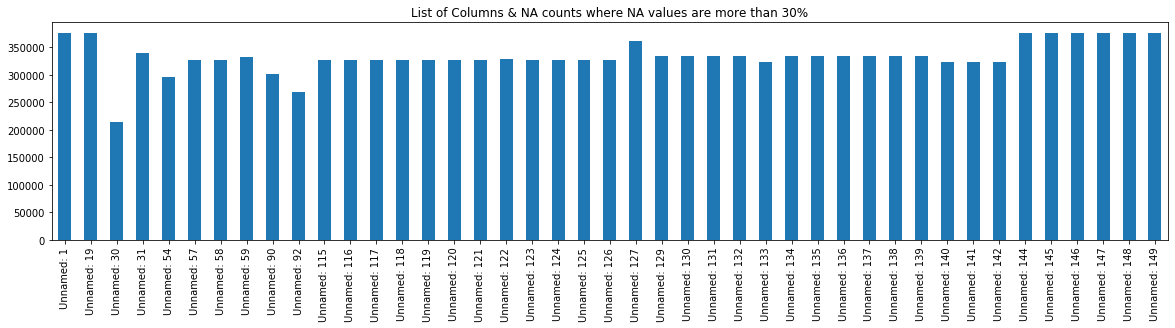

In [4]:
#Columns with 30% Missing Values
nan_columns = df.isnull().sum()
nan_columns = nan_columns[nan_columns.values >(0.3*len(df))]

plt.figure(figsize=(20,4))
nan_columns.plot(kind='bar')

plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

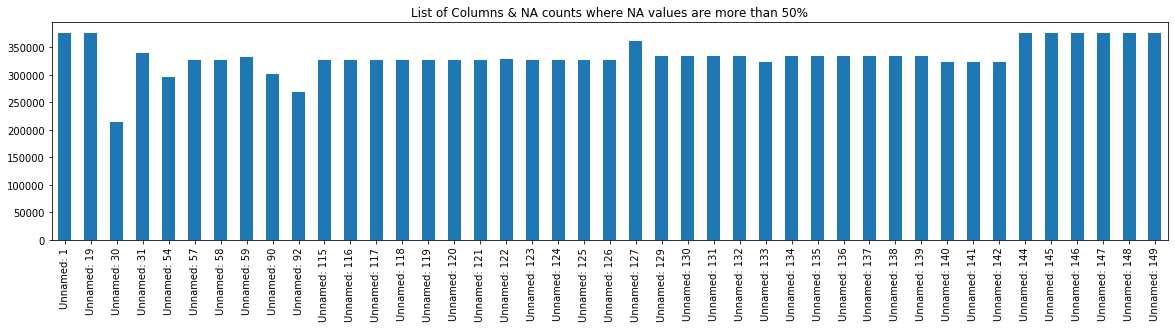

In [5]:
#Columns with 50% Missing Values
nan_columns = df.isnull().sum()
nan_columns = nan_columns[nan_columns.values >(0.5*len(df))]

plt.figure(figsize=(20,4))
nan_columns.plot(kind='bar')

plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()

**Obserations:** we can see that there are many columns with over 50% of missing data. Luckily, a lot of these columns may not be useful for modeling because not all of this data was available at origination. My goal is to find what data elements are most relevant for investor's decision making on whether to accept a loan application.

Also, the amount of data available to us is also in our favor. We have a sufficient amount of data, where removing the data that is not relevant or incomplete would not cause issues for modeling.

In [17]:
df['settlement_status'].value_counts(dropna=False)

NaN         376269
ACTIVE          37
COMPLETE         3
BROKEN           2
Name: settlement_status, dtype: int64

In [18]:
df['member_id'].value_counts(dropna=False)

NaN    376311
Name: member_id, dtype: int64

In [19]:
df['desc'].value_counts()

Series([], Name: desc, dtype: int64)

In [7]:
#df.columns[df.isna().any()].tolist()

In [21]:
df.loc[:, df.isna().any()]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,5000.0,5000.0,5000.0,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,NaN,...,393.88,19282.07,668.12,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,33000.0,33000.0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,19000.0,19000.0,18975.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,15000.0,15000.0,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105009,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,registered dental hygienist,...,163.93,9595.42,324.23,N,NaN,NaN,NaN,NaN,NaN,NaN
105010,NaN,7500.0,7500.0,7500.0,60 months,8.19%,152.76,A,A4,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
105011,NaN,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,sanitation,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
105012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df.dropna(how = 'all', axis=1)  ## Drop any column if all values are NA, drop that row or column.
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,163477201,5000.0,5000.0,5000.0,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,164027473,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,NaN,...,393.88,19282.07,668.12,N,NaN,NaN,NaN,NaN,NaN,NaN
2,164137439,33000.0,33000.0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,162948736,19000.0,19000.0,18975.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,164131732,15000.0,15000.0,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105009,163221893,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,registered dental hygienist,...,163.93,9595.42,324.23,N,NaN,NaN,NaN,NaN,NaN,NaN
105010,163197179,7500.0,7500.0,7500.0,60 months,8.19%,152.76,A,A4,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
105011,162914373,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,sanitation,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
105012,Total amount funded in policy code 1: 1767320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(376311, 148)

In [26]:
len(df) / 2

188155.5

In [27]:
half_count = len(df) / 2
df = df.dropna(thresh=half_count,axis=1)  ## Drop any column with more than 50% missing values
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,163477201,5000.0,5000.0,5000.0,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,...,100.0,NaN,0.0,0.0,23453.0,17803.0,0.0,20453.0,N,N
1,164027473,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,NaN,...,100.0,50.0,1.0,0.0,60800.0,42566.0,5200.0,40000.0,N,N
2,164137439,33000.0,33000.0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,...,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,N,N
3,162948736,19000.0,19000.0,18975.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,...,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,N,N
4,164131732,15000.0,15000.0,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,...,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105009,163221893,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,registered dental hygienist,...,80.9,50.0,0.0,0.0,259510.0,40030.0,16300.0,0.0,Y,N
105010,163197179,7500.0,7500.0,7500.0,60 months,8.19%,152.76,A,A4,NaN,...,93.8,0.0,0.0,0.0,25100.0,7862.0,15300.0,0.0,N,N
105011,162914373,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,sanitation,...,100.0,0.0,0.0,0.0,358498.0,15855.0,33200.0,29742.0,N,N
105012,Total amount funded in policy code 1: 1767320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After we dropped all columns with more than 50% nan values, the size of the data dataframe is 376311 rows × 107 columns.

In [33]:
#The last two rows 105012 and 105013 contain 99% Nan as they were subtotals in the original dataset
df.drop(df.index[[105013, 105012]], inplace=True)
df

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,163477201,5000.0,5000.0,5000.0,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,...,100.0,NaN,0.0,0.0,23453.0,17803.0,0.0,20453.0,N,N
1,164027473,20000.0,20000.0,20000.0,36 months,12.40%,668.12,B,B4,NaN,...,100.0,50.0,1.0,0.0,60800.0,42566.0,5200.0,40000.0,N,N
2,164137439,33000.0,33000.0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,...,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,N,N
3,162948736,19000.0,19000.0,18975.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,...,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,N,N
4,164131732,15000.0,15000.0,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,...,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105007,163119880,10525.0,10525.0,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,...,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0,N,N
105008,163267959,16000.0,16000.0,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,...,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0,N,N
105009,163221893,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,registered dental hygienist,...,80.9,50.0,0.0,0.0,259510.0,40030.0,16300.0,0.0,Y,N
105010,163197179,7500.0,7500.0,7500.0,60 months,8.19%,152.76,A,A4,NaN,...,93.8,0.0,0.0,0.0,25100.0,7862.0,15300.0,0.0,N,N


In [34]:
df.shape

(376305, 107)

In [35]:
## Saving a csv at this step
df.to_csv('LCdata_cleaning01.csv', index=False)

In [30]:
df.isnull().sum().sort_values()

id                              0
delinq_amnt                     6
chargeoff_within_12_mths        6
acc_open_past_24mths            6
inq_last_12m                    6
                            ...  
next_pymnt_d                28108
emp_length                  32553
mths_since_recent_inq       42428
il_util                     49208
emp_title                   54706
Length: 107, dtype: int64

In [31]:
df['emp_length'].value_counts(dropna=False)  

10+ years    110167
< 1 year      48283
2 years       33527
NaN           32553
3 years       29454
1 year        26016
5 years       24343
4 years       22222
6 years       16023
7 years       13101
8 years       11580
9 years        9042
Name: emp_length, dtype: int64

In [44]:
# We still have quite a few missing values in certain fields. 
df.isnull().sum().sort_values()

id                              0
delinq_amnt                     4
chargeoff_within_12_mths        4
acc_open_past_24mths            4
inq_last_12m                    4
                            ...  
next_pymnt_d                28106
emp_length                  32551
mths_since_recent_inq       42426
il_util                     49206
emp_title                   54703
Length: 107, dtype: int64

In [43]:
#I would like to see how much data we have left if we were to drop all Nan values. 
tentative = df.dropna()
tentative

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
2,164137439,33000.0,33000.0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,...,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,N,N
3,162948736,19000.0,19000.0,18975.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,...,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,N,N
4,164131732,15000.0,15000.0,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,...,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,N,N
5,164012431,21325.0,21325.0,21325.0,60 months,13.08%,486.09,B,B5,Senior Accountant,...,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0,N,N
6,162765314,12000.0,12000.0,12000.0,60 months,17.74%,303.03,C,C5,registered nurse,...,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105005,163469601,15000.0,15000.0,15000.0,36 months,17.74%,540.34,C,C5,Special Education Teacher,...,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0,N,N
105006,162198092,6000.0,6000.0,6000.0,36 months,11.02%,196.49,B,B2,Assistant Foreman,...,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0,N,N
105007,163119880,10525.0,10525.0,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,...,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0,N,N
105008,163267959,16000.0,16000.0,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,...,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0,N,N


After my test to drop all nan values, we are left with 229,607 rows and 107 columns, which is sufficient for modeling. I may drop the rest of the nan values. But first, I would like to further explore the columns and dive into the LendingClub Data Dictionary.

### Dropping columns that we won't be using in modeling

As a reminder, our goal is help investors make decisions on loan applications. We want to figure out whether a loan would last and what factors, at the time the loan is issued, are associated with longer or shorter time to complete payment (or time until charged-off). The LC Data Dictionary can be found here (project_6_LC/LCDataDictionary.xlsx). We will deep dive into data dcitionary and carefully review the data elements in order to identify the fields that are available to investors at the time of origination, and thus would be included in our modeling.

**Fields that are not relavant to the analysis:**
Some of the columns are not needed for modeling: url, id, member_id, policy_code, zip_code (only partial zip code is provided). The column id: A unique LC assigned ID for the loan listing. The column title is very similar to purpose, and could be dropped as well (as it does not provide any additional information).

**Fields that are not available at the time of origination:**
There are also columns that are not a part of the original data provided by the borrower at the time of application, and thus this data could not be used by investors to make their decisions of whether to accept an application.

**Validating some of the fields that are available at the time of origination:** 
dti
dti_joint
earliest_cr_line
emp_length
emp_title
fico_range_high	The upper boundary range the borrower’s FICO at loan origination belongs to.
fico_range_low	The lower boundary range the borrower’s FICO at loan origination belongs to.

In [41]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag'],
      dtype='object', length=107)

In [75]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag
0,5000.0,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,...,3.0,100.0,NaN,0.0,0.0,23453.0,17803.0,0.0,20453.0,N
1,20000.0,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,...,2.0,100.0,50.0,1.0,0.0,60800.0,42566.0,5200.0,40000.0,N


In [76]:
df.shape

(376305, 81)

Columns that have to be dropped: <br>
                 ['id', 'title', 'pymnt_plan', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 
                'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'funded_amnt', 'funded_amnt_inv', 'url', 'next_pymnt_d',
                'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                'total_pymnt_inv', 'total_rec_prncp', 'debt_settlement_flag',
                'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
                'last_fico_range_high', 'last_fico_range_low', 'policy_code', 'total_rec_int',
                'debt_settlement_flag_date', 'settlement_date', 'hardship_flag',
                'settlement_status', 'settlement_amount', 'settlement_term',
                'settlement_percentage', 'chargeoff_within_12_mths', 'hardship_flag', 'hardship_type', 
                'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount',
                'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
                'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest',
                'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag', 'zip_code']


In [77]:
#Created a opy of the dataframe to back it up
df_new = df.copy()
df_new

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag
0,5000.0,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,...,3.0,100.0,NaN,0.0,0.0,23453.0,17803.0,0.0,20453.0,N
1,20000.0,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,...,2.0,100.0,50.0,1.0,0.0,60800.0,42566.0,5200.0,40000.0,N
2,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,...,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,N
3,19000.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,...,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,N
4,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,...,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105007,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,10+ years,OWN,40000.0,...,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0,N
105008,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,10+ years,RENT,80000.0,...,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0,N
105009,10000.0,36 months,10.33%,324.23,B,B1,registered dental hygienist,10+ years,MORTGAGE,85000.0,...,6.0,80.9,50.0,0.0,0.0,259510.0,40030.0,16300.0,0.0,N
105010,7500.0,60 months,8.19%,152.76,A,A4,NaN,< 1 year,RENT,30000.0,...,1.0,93.8,0.0,0.0,0.0,25100.0,7862.0,15300.0,0.0,N


In [ ]:
#df.drop(df.columns[cols],axis=1,inplace=True)

In [84]:
# df_new = df_new.drop(df.columns['id', 'title', 'pymnt_plan', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 
#                 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'funded_amnt', 'funded_amnt_inv', 'url', 'next_pymnt_d',
#                 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
#                 'total_pymnt_inv', 'total_rec_prncp', 
#                 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
#                 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
#                 'last_fico_range_high', 'last_fico_range_low', 'policy_code', 'total_rec_int', 'hardship_flag', 'chargeoff_within_12_mths', 
#                   'hardship_flag', 'zip_code'], axis=1, inplace=True)

In [79]:
df_new.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_b

In [80]:
df_new

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag
0,5000.0,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,...,3.0,100.0,NaN,0.0,0.0,23453.0,17803.0,0.0,20453.0,N
1,20000.0,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,...,2.0,100.0,50.0,1.0,0.0,60800.0,42566.0,5200.0,40000.0,N
2,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,...,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0,N
3,19000.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,...,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0,N
4,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,...,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105007,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,10+ years,OWN,40000.0,...,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0,N
105008,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,10+ years,RENT,80000.0,...,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0,N
105009,10000.0,36 months,10.33%,324.23,B,B1,registered dental hygienist,10+ years,MORTGAGE,85000.0,...,6.0,80.9,50.0,0.0,0.0,259510.0,40030.0,16300.0,0.0,N
105010,7500.0,60 months,8.19%,152.76,A,A4,NaN,< 1 year,RENT,30000.0,...,1.0,93.8,0.0,0.0,0.0,25100.0,7862.0,15300.0,0.0,N


In [81]:
df.shape

(376305, 81)

In [82]:
df_new.shape

(376305, 81)

In [86]:
df['debt_settlement_flag'].value_counts(dropna=False)

N      376259
Y          42
NaN         4
Name: debt_settlement_flag, dtype: int64

In [87]:
#dropping the 'debt_settlement_flag' - this is not a field available at origination
df.drop(columns= 'debt_settlement_flag', axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [89]:
df.shape

(376305, 80)

In [90]:
df.isnull().sum()

loan_amnt                     4
term                          4
int_rate                      4
installment                   4
grade                         4
                             ..
tax_liens                     4
tot_hi_cred_lim               4
total_bal_ex_mort             4
total_bc_limit                4
total_il_high_credit_limit    4
Length: 80, dtype: int64

In [93]:
#Check what rows have null values - example of loan_amnt
df[df['loan_amnt'].isnull()]


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
128258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#The last 4 rows containing Nan - dropping by index
df.drop(df.index[[128258, 128259, 143035, 143036]], inplace=True)
df

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
2,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,...,0.0,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0
3,19000.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,...,0.0,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0
4,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,...,0.0,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0
5,21325.0,60 months,13.08%,486.09,B,B5,Senior Accountant,3 years,MORTGAGE,87000.0,...,0.0,1.0,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0
6,12000.0,60 months,17.74%,303.03,C,C5,registered nurse,8 years,RENT,75000.0,...,0.0,2.0,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105007,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,10+ years,OWN,40000.0,...,0.0,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0
105008,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,10+ years,RENT,80000.0,...,0.0,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0
105009,10000.0,36 months,10.33%,324.23,B,B1,registered dental hygienist,10+ years,MORTGAGE,85000.0,...,0.0,6.0,80.9,50.0,0.0,0.0,259510.0,40030.0,16300.0,0.0
105010,7500.0,60 months,8.19%,152.76,A,A4,NaN,< 1 year,RENT,30000.0,...,0.0,1.0,93.8,0.0,0.0,0.0,25100.0,7862.0,15300.0,0.0


In [96]:
df.shape

(376293, 80)

In [97]:
df.duplicated().any()

True

In [98]:
df.duplicated()

2         False
3         False
4         False
5         False
6         False
          ...  
105007    False
105008    False
105009    False
105010    False
105011    False
Length: 376293, dtype: bool

In [99]:
df[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
128259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df.isnull().sum()

loan_amnt                     4
term                          4
int_rate                      4
installment                   4
grade                         4
                             ..
tax_liens                     4
tot_hi_cred_lim               4
total_bal_ex_mort             4
total_bc_limit                4
total_il_high_credit_limit    4
Length: 80, dtype: int64

In [107]:
df['emp_title'].value_counts(dropna=False)

NaN                                54699
Teacher                             6200
Manager                             5374
Driver                              2881
Registered Nurse                    2715
                                   ...  
Manager trainer                        1
VP Food and Beverage                   1
Building Maintenance Supervisor        1
Lead Medical Tech                      1
Style Attendant                        1
Name: emp_title, Length: 103907, dtype: int64

In [110]:
df['emp_title'].nunique() 

103906

In [101]:
tentative2 = df.dropna()
tentative2

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
2,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,...,0.0,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0
3,19000.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,...,0.0,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0
4,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,...,0.0,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0
5,21325.0,60 months,13.08%,486.09,B,B5,Senior Accountant,3 years,MORTGAGE,87000.0,...,0.0,1.0,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0
6,12000.0,60 months,17.74%,303.03,C,C5,registered nurse,8 years,RENT,75000.0,...,0.0,2.0,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105005,15000.0,36 months,17.74%,540.34,C,C5,Special Education Teacher,1 year,RENT,62000.0,...,0.0,3.0,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0
105006,6000.0,36 months,11.02%,196.49,B,B2,Assistant Foreman,10+ years,MORTGAGE,80000.0,...,0.0,1.0,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0
105007,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,10+ years,OWN,40000.0,...,0.0,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0
105008,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,10+ years,RENT,80000.0,...,0.0,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0


In [102]:
#Saving the cleaned dataframe to csv (80 columns, 376305 rows)
df.to_csv('LCdataset_cleaned80.csv', index=False)

In [ ]:
#Dropping all Nans - since we have sufficient amount of data, we will be dropping the rest of the Nan values

#Dataframe size after dropping Nans: 254794 rows × 80 columns

In [103]:
df_sans_nan = df.dropna()
df_sans_nan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
2,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,...,0.0,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0
3,19000.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,...,0.0,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0
4,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,...,0.0,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0
5,21325.0,60 months,13.08%,486.09,B,B5,Senior Accountant,3 years,MORTGAGE,87000.0,...,0.0,1.0,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0
6,12000.0,60 months,17.74%,303.03,C,C5,registered nurse,8 years,RENT,75000.0,...,0.0,2.0,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105005,15000.0,36 months,17.74%,540.34,C,C5,Special Education Teacher,1 year,RENT,62000.0,...,0.0,3.0,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0
105006,6000.0,36 months,11.02%,196.49,B,B2,Assistant Foreman,10+ years,MORTGAGE,80000.0,...,0.0,1.0,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0
105007,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,10+ years,OWN,40000.0,...,0.0,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0
105008,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,10+ years,RENT,80000.0,...,0.0,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0


In [105]:
#Saving the cleaned dataframe to csv - Nans dropped (254794 rows × 80 columns)
df_sans_nan.to_csv('LCdataset_cleaned80_254794.csv', index=False)

**Notes:** The following columns were dropped, but here I am keeping track of their content prior to dropping.

#policy_code - exploring before dropping
df['policy_code'].value_counts(dropna=False)
1.0    376301
NaN         4
Name: policy_code, dtype: int64


#emp_title - exploring before dropping
df['emp_title'].value_counts(dropna=False)
NaN                                54703
Teacher                             6200
Manager                             5374
Driver                              2881
Registered Nurse                    2715
                                   ...  
Manager trainer                        1
VP Food and Beverage                   1
Building Maintenance Supervisor        1
Lead Medical Tech                      1
Regional Inside Sales Manager          1


#exploring before dropping
df['title'].value_counts(dropna=False) 
Debt consolidation         203670
Credit card refinancing    104013
Home improvement            21938
Other                       21613
Major purchase               6644
Medical expenses             4354
Home buying                  3102
Car financing                3085
Business                     2920
Vacation                     2728
Moving and relocation        2062
Green loan                    172
NaN                             4
Name: title, dtype: int64


In [45]:
#policy_code - exploring before dropping
df['policy_code'].value_counts(dropna=False)

1.0    376301
NaN         4
Name: policy_code, dtype: int64

In [42]:
#emp_title - exploring before dropping
df['emp_title'].value_counts(dropna=False)

NaN                                54703
Teacher                             6200
Manager                             5374
Driver                              2881
Registered Nurse                    2715
                                   ...  
Manager trainer                        1
VP Food and Beverage                   1
Building Maintenance Supervisor        1
Lead Medical Tech                      1
Regional Inside Sales Manager          1
Name: emp_title, Length: 103911, dtype: int64

In [39]:
df['title'].value_counts(dropna=False) # exploring before dropping

Debt consolidation         203670
Credit card refinancing    104013
Home improvement            21938
Other                       21613
Major purchase               6644
Medical expenses             4354
Home buying                  3102
Car financing                3085
Business                     2920
Vacation                     2728
Moving and relocation        2062
Green loan                    172
NaN                             4
Name: title, dtype: int64

In [40]:
df['purpose'].value_counts(dropna=False) 

debt_consolidation    203670
credit_card           104013
home_improvement       21938
other                  21613
major_purchase          6644
medical                 4354
house                   3102
car                     3085
small_business          2920
vacation                2728
moving                  2062
renewable_energy         172
NaN                        4
Name: purpose, dtype: int64